In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
bank=pd.read_csv('bank-full.csv',sep =';' )
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank.shape

(45211, 17)

In [24]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [25]:
bank[['job','marital','education','default','housing','loan','contact','month','poutcome','y']]=bank[['job','marital','education','default','housing','loan','contact','month','poutcome','y']].apply(lambda x: pd.factorize(x)[0])
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,0,0,0,5,0,261,1,-1,0,0,0
1,44,1,1,1,0,29,0,0,0,5,0,151,1,-1,0,0,0
2,33,2,0,1,0,2,0,1,0,5,0,76,1,-1,0,0,0
3,47,3,0,2,0,1506,0,0,0,5,0,92,1,-1,0,0,0
4,33,4,1,2,0,1,1,0,0,5,0,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,5,977,3,-1,0,0,1
45207,71,5,2,3,0,1729,1,0,1,17,5,456,2,-1,0,0,1
45208,72,5,0,1,0,5715,1,0,1,17,5,1127,5,184,3,3,1
45209,57,3,0,1,0,668,1,0,2,17,5,508,4,-1,0,0,0


In [26]:
#Dividing our data into input and output variables
X = bank.iloc[:,1:]    #Objects for Independent Variables
Y = bank.iloc[:,16]     #Objects for Dependent Variables
classifier = LogisticRegression()
classifier.fit(X,Y)

/Users/najeebahamed/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

0 = Male, 1 = Female

Y = Person gets bankrupt  N = Person doesnt get bankrupt

In [27]:
classifier.coef_

array([[ 5.90689567e-02, -1.99520750e-01, -6.19483444e-01,
        -2.23380478e-02,  4.92756655e-06,  6.23217953e-02,
        -2.09611810e-01, -1.59804291e-01, -2.64685341e-02,
         2.17431687e-02,  3.34408315e-03, -1.11637421e+00,
        -2.57105375e-03,  1.49847725e-01,  4.73608240e-01,
         1.27512393e+00]])

In [28]:
Beta_Coefficients=pd.Series(classifier.coef_[0])
Beta_Coefficients

0     0.059069
1    -0.199521
2    -0.619483
3    -0.022338
4     0.000005
5     0.062322
6    -0.209612
7    -0.159804
8    -0.026469
9     0.021743
10    0.003344
11   -1.116374
12   -0.002571
13    0.149848
14    0.473608
15    1.275124
dtype: float64

In [29]:
Coef_df= pd.DataFrame({'Variables':['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome'], 'Beta Coefficients': Beta_Coefficients})
Coef_df

,Variables,Beta Coefficients
0,age,0.059069
1,job,-0.199521
2,marital,-0.619483
3,education,-0.022338
4,default,0.000005
5,balance,0.062322
6,housing,-0.209612
7,loan,-0.159804
8,contact,-0.026469
9,day,0.021743


Gender: 0 = Male,1 = Female

Y=A given person might get bankrupt, N=A given person might not get bankrupt

In [30]:
classifier.intercept_

array([-0.64441013])

In [31]:
classifier.classes_

array([0, 1])

In [32]:
import numpy as np
np.set_printoptions(suppress=True)
pred_prob=classifier.predict_proba(X)[0:16]
pred_prob

array([[0.73246996, 0.26753004],
       [0.89523737, 0.10476263],
       [0.91272361, 0.08727639],
       [0.93322013, 0.06677987],
       [0.91437885, 0.08562115],
       [0.806057  , 0.193943  ],
       [0.82804289, 0.17195711],
       [0.71566034, 0.28433966],
       [0.96394057, 0.03605943],
       [0.92155354, 0.07844646],
       [0.85947668, 0.14052332],
       [0.86933426, 0.13066574],
       [0.67305826, 0.32694174],
       [0.94441615, 0.05558385],
       [0.81963669, 0.18036331],
       [0.90653747, 0.09346253]])

In [33]:
pred_prob=pd.DataFrame(pred_prob)
pred_prob['y_pred']=classifier.predict(X)[0:16]
pred_prob
pred_prob['y_pred_maual']=pred_prob[1].apply(lambda x: 0 if x<0.5 else 1)
pred_prob

,0,1,y_pred,y_pred_maual
0,0.732470,0.267530,0,0
1,0.895237,0.104763,0,0
2,0.912724,0.087276,0,0
3,0.933220,0.066780,0,0
4,0.914379,0.085621,0,0
5,0.806057,0.193943,0,0
6,0.828043,0.171957,0,0
7,0.715660,0.284340,0,0
8,0.963941,0.036059,0,0
9,0.921554,0.078446,0,0


In [34]:
#Predictions for X dataset
y_pred = classifier.predict(X)

In [35]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
y_pred_df= pd.DataFrame({'actual':Y,
                         'prediction': classifier.predict(X)})

In [37]:
#0 = a person might get bankrupt, 1 = a person might not get bankrupt
y_pred_df[0:16]

,actual,prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


Actual = 0 & Prediction = 0
True Negatives (TN)

Actual = 1 & Prediction = 1
True Positives (TP)

Actual = 0 & Prediction = 1
False Positives (FP)

Actual = 1 & Prediction = 0
False Negative (FN)

In [38]:
TP=len(y_pred_df[(y_pred_df['actual']==1) & (y_pred_df['prediction']==1)])
TN=len(y_pred_df[(y_pred_df['actual']==0) & (y_pred_df['prediction']==0)])
FP=len(y_pred_df[(y_pred_df['actual']==0) & (y_pred_df['prediction']==1)])
FN=len(y_pred_df[(y_pred_df['actual']==1) & (y_pred_df['prediction']==0)])

In [39]:
print('True Positives', TP)
print('True Negatives',TN)
print('False Positives', FP)
print('False Negatives', FN)

True Positives 2359
True Negatives 39269
False Positives 653
False Negatives 2930


In [40]:
print(len(y_pred_df[y_pred_df['actual']==y_pred_df['prediction']]))
print(len(y_pred_df))

len(y_pred_df[y_pred_df['actual']==y_pred_df['prediction']])/len(y_pred_df)

41628
45211


0.9207493751520648

In [41]:
print(len(y_pred_df[y_pred_df['actual'] != y_pred_df['prediction']]))
print(len(y_pred_df))

len(y_pred_df[y_pred_df['actual']!=y_pred_df['prediction']])/len(y_pred_df)

3583
45211


0.07925062484793524

In [42]:
classifier.score(X,Y)

0.9207493751520648

In [43]:
print('Accuracy',round(len(y_pred_df[y_pred_df['actual']==y_pred_df['prediction']])/len(y_pred_df),4))
print('Accuracy', round(classifier.score(X,Y),4))

Accuracy 0.9207
Accuracy 0.9207


In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,y_pred)
print(cm)

[[39269   653]
 [ 2930  2359]]


In [45]:
#Checking for Accuracy in term of percentage
((39269+2358)/(39269+653+2931+2358))*100

92.07272566410829

In [46]:
#Sensitivity
Sensitivity=(TP/(TP+FN))
((2358)/(2358+2931))*100
print('Sensitivity',round(Sensitivity,2))

Sensitivity 0.45


In [47]:
#Specificity
Specificity=(TN/(TN+FP))
((39269)/(39269+653))*100
print('Specificity',round(Specificity,2))

Specificity 0.98


In [48]:
#Precision
Precision=(TP/(TP+FP))
((2358)/(2358+653))*100
print('Precision',round(Precision,2))

Precision 0.78


In [49]:
#F-Score
F_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print('F_Score',round(F_Score,2))

F_Score 0.57


In [50]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     39922
           1       0.78      0.45      0.57      5289

    accuracy                           0.92     45211
   macro avg       0.86      0.71      0.76     45211
weighted avg       0.91      0.92      0.91     45211



# ROC (Receiver Operating Curve)

0.714831572824334


Text(0, 0.5, 'True Positive Rate / Sensitivity')

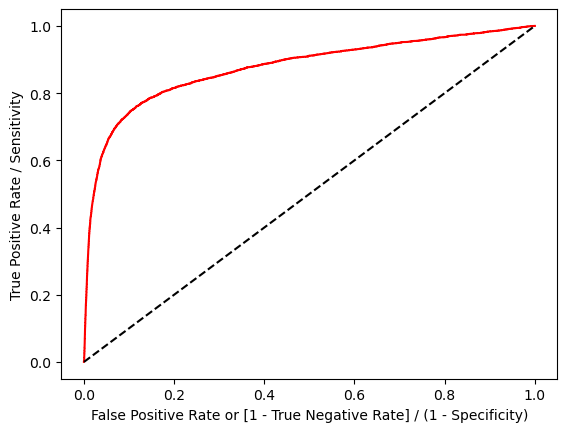

In [51]:
#AUC = Area Under Curve
#The greater the area under the curve, the better the model.
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate] / (1 - Specificity)')
plt.ylabel('True Positive Rate / Sensitivity')